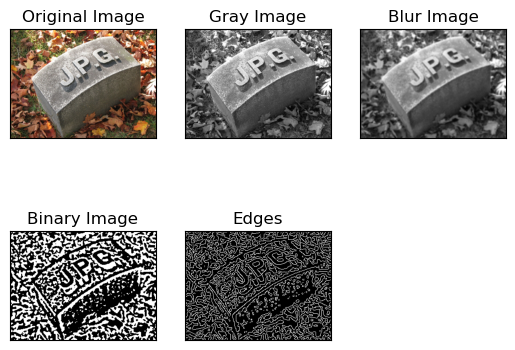

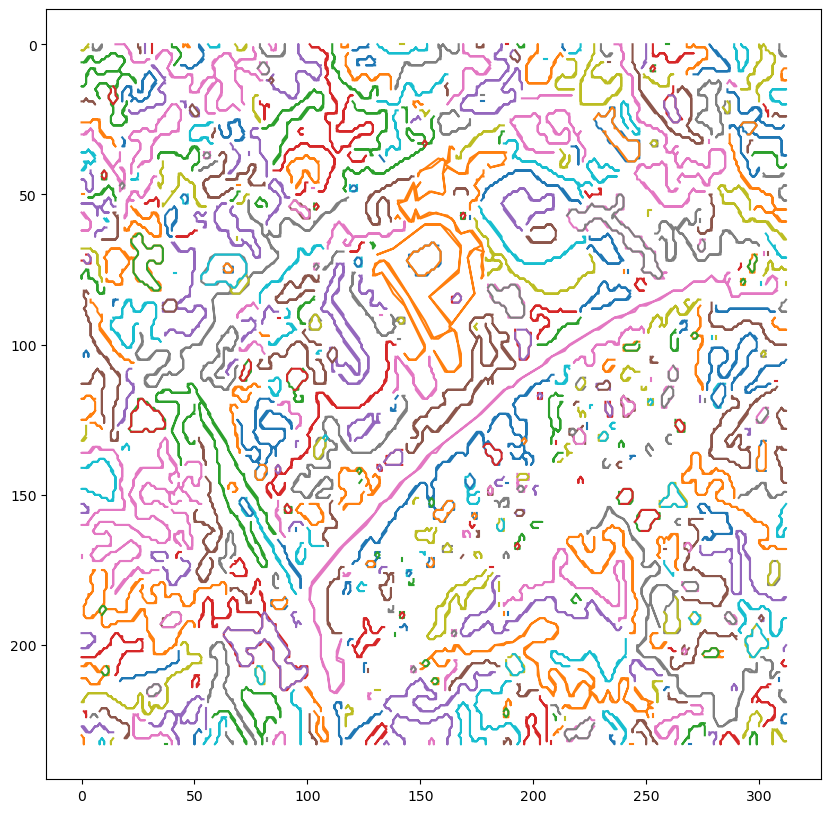

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to reduce noise and smoothen the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Convert to binary image
    _, binary = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV)
     # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(blur, 100, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 3)
    return RGB_img, gray, blur, binary

def detect_edges(binary_image):
    # Detect edges using Canny edge detection
    edges = cv2.Canny(binary_image, 20, 150, apertureSize=3)
    return edges

def generate_paths(edges):
    # Find contours from the edge image
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    paths = []
    for contour in contours:
        # Approximate the contour to reduce the number of points
        epsilon = 0.001 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        path = np.squeeze(approx).tolist()  # Convert to list of (x,y) pairs
        
        # Ensure path is in the format: list of (x, y) pairs
        if isinstance(path[0], list) or isinstance(path[0], tuple):
            # path is already a list of points
            paths.append(path)
        else:
            
            # path is a single point, wrap it in a list
            #paths.append([path])
            pass
    return paths


def plot_images(image, gray, blur, binary, edges):
    titles = ['Original Image', 'Gray Image', 'Blur Image', 'Binary Image', 'Edges']
    images = [image, gray, blur, binary, edges]
    for i in range(5):
        plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

def plot_paths(paths):
    plt.figure(figsize=(10, 10))
    for path in paths:
        # Ensure path is not empty and is a list of points
        if path and isinstance(path, list) and all(isinstance(p, list) or isinstance(p, tuple) for p in path):
            # Unpack the points and plot
            xs, ys = zip(*path)
            plt.plot(xs, ys)
        else:
            # Handle single point or unexpected format
            print(f"Skipping path due to unexpected format: {path}")
    plt.gca().invert_yaxis()  # Invert y axis to match image coordinates
    plt.show()

image_path = 'rip.jpg'
image, gray, blur, binary = preprocess_image(image_path)
edges = detect_edges(binary)
paths = generate_paths(edges)
#print(paths)

plot_images(image, gray, blur, binary, edges)  # Plotting the intermediate steps
plot_paths(paths)  # Plotting the paths for visualization
